In [1]:
import pydmd

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

from pydmd import HODMD

## Read Dataset

In [5]:
df = pd.read_csv("../Dataset/CleanedData.csv",header=1)
data = df.iloc[:,1:].T
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, Afghanistan to Zimbabwe
Columns: 1032 entries, 0 to 1031
dtypes: int64(1032)
memory usage: 1.6+ MB


In [4]:
data.shape


(201, 1032)

In [77]:
train_days = 100
pred_days = 40
start_day = 0
d=20

countries_of_intrest = ["China","India","Bangladesh", "Afghanistan","United Arab Emirates","United Kingdom"]
reduced_data = data.loc[countries_of_intrest, start_day:start_day+train_days-1]

In [78]:
reduced_data

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,86452,86508,86548,86594,86632,86661,86692,86754,86783,86828
India,0,0,0,0,0,0,0,0,1,1,...,20080,21370,23077,24530,26283,27890,29451,31324,33062,34863
Bangladesh,0,0,0,0,0,0,0,0,0,0,...,3382,3772,4186,4689,4998,5416,5913,6462,7103,7667
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1026,1092,1176,1226,1330,1463,1531,1703,1827,1827
United Arab Emirates,0,0,0,0,0,0,0,4,4,4,...,7755,8238,8756,9281,9813,10349,10839,11380,11929,12481
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,136023,141529,146682,151662,155445,158920,163627,168351,173796,178765


In [79]:
test = data.loc[countries_of_intrest, start_day+train_days: start_day+train_days+pred_days-1]
test

,100,101,102,103,104,105,106,107,108,109,...,130,131,132,133,134,135,136,137,138,139
China,86850,86858,86842,86838,86855,86877,86888,86905,86934,86973,...,87496,87520,87535,87538,87553,87561,87572,87581,87587,87610
India,37257,39699,42505,46437,49400,52987,56351,59695,62808,67161,...,190609,198370,207191,216824,226713,236184,246622,257486,265928,276146
Bangladesh,8238,8790,9455,10143,10929,11719,12425,13134,13770,14657,...,47153,49534,52445,55140,57563,60391,63026,65769,68504,71675
Afghanistan,2171,2469,2469,2469,2469,3224,3392,3563,3563,4402,...,15180,15836,16578,17353,17977,19055,19637,20428,21003,21308
United Arab Emirates,13038,13599,14163,14730,15192,15738,16240,16793,17417,18198,...,34557,35192,35788,36359,37018,37642,38268,38808,39376,39904
United Kingdom,183500,186726,189702,193086,196775,200612,204383,207435,209585,211907,...,257535,258979,260449,261797,263035,264146,264938,265656,266751,267909


In [80]:
def train(X,train_days,pred_days,start_day,d):
    snapshot = reduced_data.to_numpy()
    dmd = HODMD(svd_rank=6, tlsq_rank=6, exact=True, opt=True, rescale_mode='auto', d=d) 
    dmd = dmd.fit(snapshot)
    
    plt.plot(dmd.reconstructed_data.real[0,:])

    plt.plot(test.iloc[0,:],'g')
    plt.plot(snapshot[0,:],'r')
    plt.legend(["Reconstructed", "Test", "Pred data"])
    
    return dmd
    

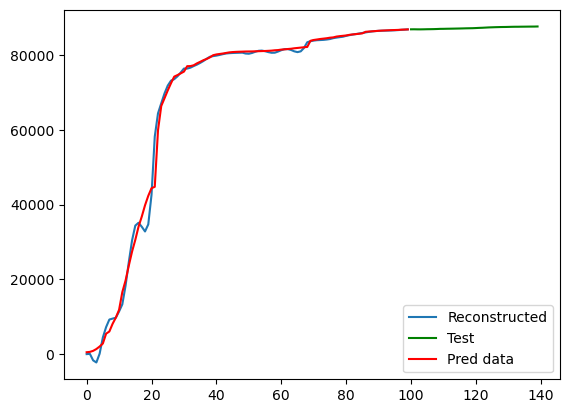

In [81]:
dmd = train(reduced_data,train_days,pred_days,start_day,80)

In [82]:
def pred(dmd,test,pred_days):
    dmd.dmd_time['tend'] = ( (start_day+train_days-1) - (start_day)  ) + pred_days
    rd = dmd.reconstructed_data.real[:,train_days: train_days+pred_days]
    
    

In [83]:
dmd.dmd_time['tend'] = (start_day + train_days + pred_days - 1)
pred = dmd.reconstructed_data.real[:, train_days:(start_day + train_days + pred_days)]

In [84]:
np.sqrt(np.power(test.to_numpy() - pred,2).mean(axis=1))

array([ 4741.26701215, 82650.21263996, 21316.47527662,  8352.52257761,
        3887.62323258, 34837.62445275])

In [85]:
gt = test.to_numpy() 

np.abs((gt-pred)/gt).mean(axis=1)


array([0.03960892, 0.38275169, 0.38674526, 0.546863  , 0.0930882 ,
       0.11265949])

In [33]:
test

,100,101,102,103,104,105,106,107,108,109,...,130,131,132,133,134,135,136,137,138,139
China,86850,86858,86842,86838,86855,86877,86888,86905,86934,86973,...,87496,87520,87535,87538,87553,87561,87572,87581,87587,87610
India,37257,39699,42505,46437,49400,52987,56351,59695,62808,67161,...,190609,198370,207191,216824,226713,236184,246622,257486,265928,276146
Bangladesh,8238,8790,9455,10143,10929,11719,12425,13134,13770,14657,...,47153,49534,52445,55140,57563,60391,63026,65769,68504,71675
Afghanistan,2171,2469,2469,2469,2469,3224,3392,3563,3563,4402,...,15180,15836,16578,17353,17977,19055,19637,20428,21003,21308
United Arab Emirates,13038,13599,14163,14730,15192,15738,16240,16793,17417,18198,...,34557,35192,35788,36359,37018,37642,38268,38808,39376,39904
United Kingdom,183500,186726,189702,193086,196775,200612,204383,207435,209585,211907,...,257535,258979,260449,261797,263035,264146,264938,265656,266751,267909


In [34]:
train_days

100

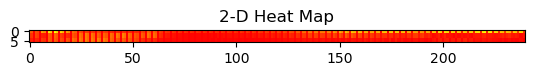

In [12]:
plt.imshow( np.abs(dmd.modes.T) , cmap = 'autumn' , interpolation = 'nearest' )
  
plt.title( "2-D Heat Map" )
plt.show()

In [420]:
dmd.dmd_time['tend'] = ( (start_day+train_days-1) - (start_day)  ) + pred_days

In [421]:
 ( (start_day+train_days-1) - (start_day)  ) + pred_days

139

In [422]:
rd = dmd.reconstructed_data.real[:,train_days: train_days+pred_days]

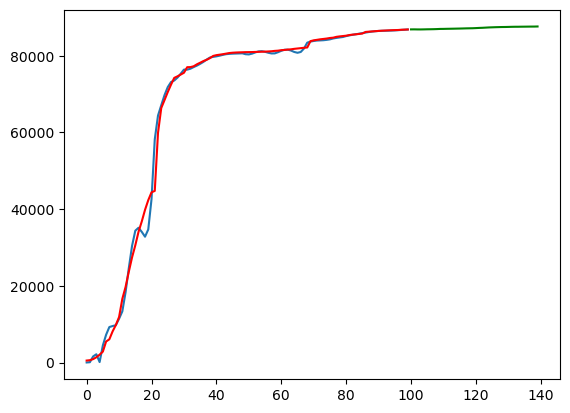

In [426]:
plt.plot(np.abs(dmd.reconstructed_data[0,:]))

plt.plot(test.iloc[0,:],'g')
plt.plot(snapshot[0,:],'r')



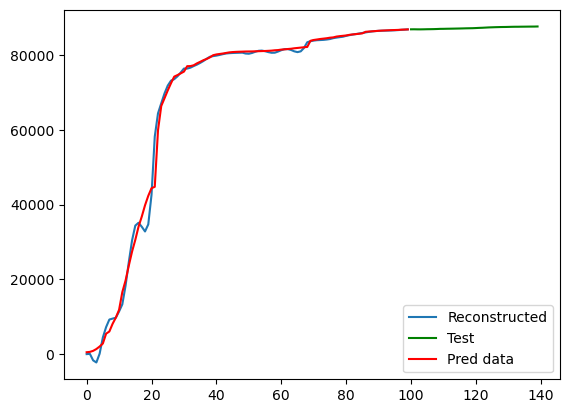

In [425]:
dmd = train(reduced_data,train_days,pred_days,start_day+30,80)

In [424]:
dmd.dmd_time['tend'] = 90

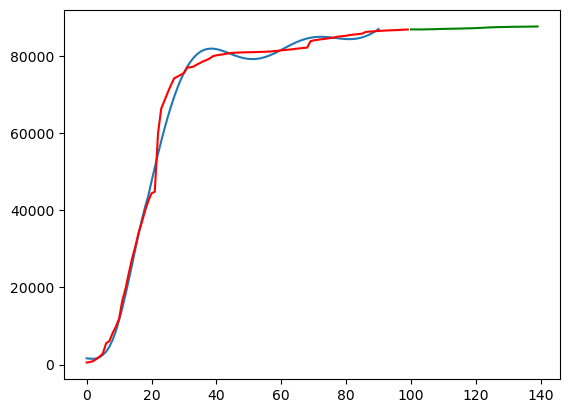

In [280]:
plt.plot(dmd.reconstructed_data.real[0,:])

plt.plot(test.iloc[0,:],'g')
plt.plot(snapshot[0,:],'r')

In [103]:
countries_of_intrest = ["China","India","Bangladesh", "Afghanistan","United Arab Emirates","United Kingdom"]

class Experiment():
    
    def __init__(self, X,
                 train_params = {"start_day":0, "train_days":40, "pred_days":5},
                 HODMD_params = { "svd_rank":0, "tlsq_rank":0, "exact":False, "opt":False,
                 "rescale_mode":None, "forward_backward":False, "d":1,
                 "sorted_eigs":False, "reconstruction_method":"first",
                 "svd_rank_extra":0},
                countries_of_intrest=None):
        self.start_day = train_params["start_day"]
        self.train_days = train_params["train_days"]
        self.pred_days = train_params["pred_days"]
        self.X = X
        self.DMD = HODMD(**HODMD_params)
        
        self.countries_of_intrest = countries_of_intrest
        
        if countries_of_intrest is not None:
        
            self.train_data = self.X.loc[self.countries_of_intrest, self.start_day:self.start_day+self.train_days-1]
            self.ground_truth = self.X.loc[self.countries_of_intrest, self.start_day+self.train_days: self.start_day+self.train_days+self.pred_days-1]
            
        if countries_of_intrest is None:
            
            self.train_data = self.X.loc[:, self.start_day:self.start_day+self.train_days-1]
            self.ground_truth = self.X.loc[:, self.start_day+self.train_days: self.start_day+self.train_days+self.pred_days-1]

    def fit(self):

        snapshot = self.train_data.to_numpy()
        self.DMD = self.DMD.fit(snapshot)

    def pred(self):
        self.DMD.dmd_time['tend'] = (self.start_day + self.train_days + self.pred_days - 1)
        self.pred_data =  self.DMD.reconstructed_data.real[:, self.start_day+self.train_days:(self.start_day + self.train_days + self.pred_days)]
        return self.pred_data

    def MAPE(self):
        gt = self.ground_truth.to_numpy() 
        self.MAPE = np.abs((gt-self.pred_data)/(gt+0.00000001)).mean(axis=1)   
        return self.MAPE
        
    
 
        
        
        
        
        

In [104]:
exp = Experiment(data)
exp.fit()
exp.pred()
exp.MAPE()



c:\Users\aadha\Anaconda3\lib\site-packages\pydmd\dmdbase.py:715: UserWarning: Input data matrix X has condition number 1.242848806459757e+19. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


array([1.06552170e+06, 7.63818388e+00, 3.96749102e+04, 9.99999941e-01,
       7.67675687e+00, 2.39073994e+00, 2.98779598e+01, 8.06839549e-01,
       3.05896315e+04, 2.53034415e+05, 5.03518498e+03, 2.02695902e+04,
       4.48034770e+00, 6.84074882e+04, 2.76249516e-01, 9.83262295e-01,
       1.87708012e+05, 6.81295547e+03, 5.70091700e-01, 1.07999361e+00,
       2.83342302e-01, 7.60775319e+00, 2.54335097e+00, 7.49150832e-01,
       1.36652163e+05, 1.92387781e+00, 2.93563034e-01, 5.89153882e-01,
       1.47458147e+00, 3.34481287e-01, 4.80192652e-02, 1.08037658e+06,
       2.14130042e-01, 5.01679719e+04, 2.83652561e-01, 4.31542090e-01,
       2.21361620e+05, 6.46843761e+04, 2.08890362e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.99999998e-01, 0.00000000e+00,
       1.65900873e+05, 0.00000000e+00, 0.00000000e+00, 9.72743327e+03,
       1.21405967e+05, 1.87296931e+04, 0.00000000e+00, 0.00000000e+00,
       2.42333060e+04, 1.70579685e+04, 2.38131314e+04, 0.00000000e+00,
      

In [15]:
exp.train_data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,5,5,5,5,5,5
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zambia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
exp.ground_truth

,40,41,42,43,44
Afghanistan,5,5,5,5,5
Albania,0,0,0,0,0
Algeria,3,5,12,12,17
Andorra,1,1,1,1,1
Angola,0,0,0,0,0
...,...,...,...,...,...
West Bank and Gaza,0,0,0,4,7
Winter Olympics 2022,0,0,0,0,0
Yemen,0,0,0,0,0
Zambia,0,0,0,0,0


In [433]:
HODMD_parms = { "svd_rank":0, "tlsq_rank":0, "exact":False, "opt":False,
                 "rescale_mode":None, "forward_backward":False, "d":1,
                 "sorted_eigs":False, "reconstruction_method":"first",
                 "svd_rank_extra":0}

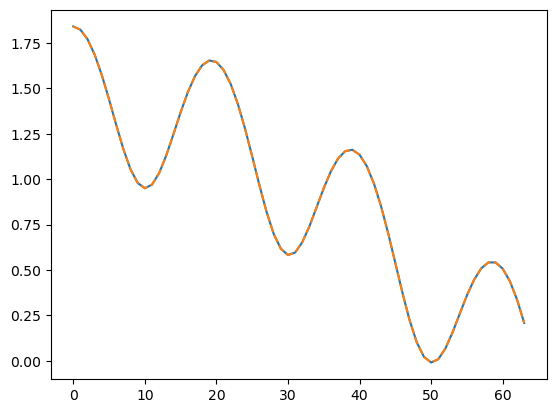

In [33]:
plt.plot(hodmd.original_timesteps, y, '-', label='original function')
plt.plot(hodmd.dmd_timesteps,  hodmd.reconstructed_data[0].real, '--', label='DMD output')